# <div dir="rtl">سوال هفتم</div>

<div dir="rtl">



<div>

In [58]:
%cd drive/MyDrive/DataMining/hw3

[Errno 2] No such file or directory: 'drive/MyDrive/DataMining/hw3'
/content/drive/MyDrive/DataMining/hw3



<div dir="rtl">

در این سلول ماژول‌های مورد نیاز را به نوت‌بوک اضافه می‌کنیم:

<div>

In [59]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


#a.


<div dir="rtl">

در این قسمت دیتاست iris را لود می‌کنیم. سپس 80 درصد از دادگان را برای آموزش و 20 درصد از آن را برای تست جداسازی می‌کنیم

سپس داده‌های آموزشی را نرمال میکنیم:


<div>

In [60]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_nor = preprocessing.normalize(X_train)


<div dir="rtl">

حال با استفاده از روش KNN و الگوریتم KDTree سعی می‌کنیم داده‌ها را کلاسبندی کنیم.

برای اینکه بهترین مقدار برای تعداد همسایه‌ها را بیابیم از تعداد 1 تا 30 همسایه را امتحان میکنیم و صحت مدل روی داده‌های تست را درون یک لیست ذخیره میکنیم.

<div>

In [61]:
acc_list_kdtree = []
for value in range(1, 31):
  knn_kdtree = KNeighborsClassifier(n_neighbors=value, algorithm="kd_tree")
  knn_kdtree.fit(X_train_nor,y_train)
  acc_list_kdtree.append(knn_kdtree.score(X_test, y_test))


<div dir="rtl">

نمودار مقدار صحت مدل روی داده‌های تست را بر اساس تعداد همسایه رسم می‌کنیم تا دید بهتری نسبت به عملکرد این الگوریتم داشته باشیم.

<div>

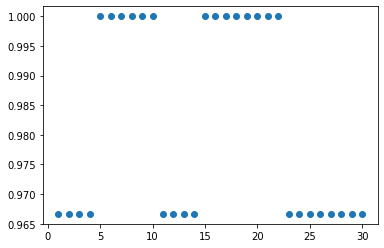

In [62]:
plt.scatter(np.arange(1,31),acc_list_kdtree)

<div dir="rtl">

با بررسی نمودار بالا میبینیم که از k 23 به بعد مدل دچار بیش برازش شده است و برای k های 1 تا 4 و 9 تا 14 مدل موفق نشده است بعضی از نمونه ها را به درستی دسته بندی کند.

من مدل با تعداد همسایه برابر با 20 را بعنوان مدل بهینه انتخاب میکنم و داده‌ها را بوسیله این مدل دسته بندی میکنم:

<div>

In [63]:
knn_kdtree = KNeighborsClassifier(n_neighbors=20, algorithm="kd_tree")
knn_kdtree.fit(X_train_nor,y_train)
y_test_kdtree = knn_kdtree.predict(X_test)
knn_kdtree.score(X_test, y_test)

1.0




<div dir="rtl">

در این قسمت برای مدلی که بالاتر شرح دادم confusion matrix را نمایش می‌دهیم.

از آنجا که به صحت 100 درصد رسیده ایم درمیابیم که همه ی نمونه ها به درستی دسته بندی شده است و با توجه به confusion matrix هم به همین نتیجه میرسیم.

<div>

In [64]:
confusion_matrix(y_test, y_test_kdtree)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

#b.


<div dir="rtl">

حال با استفاده از روش KNN و الگوریتم ball tree سعی می‌کنیم داده‌ها را کلاسبندی کنیم.

برای اینکه بهترین مقدار برای تعداد همسایه‌ها را بیابیم از تعداد 1 تا 30 همسایه را امتحان میکنیم و صحت مدل روی داده‌های تست را درون یک لیست ذخیره میکنیم.

<div>

In [65]:
acc_list_balltree = []
for value in range(1, 31):
  knn_balltree = KNeighborsClassifier(n_neighbors=value, algorithm="ball_tree")
  knn_balltree.fit(X_train_nor,y_train)
  acc_list_balltree.append(knn_balltree.score(X_test, y_test))


<div dir="rtl">

نمودار مقدار صحت مدل روی داده‌های تست را بر اساس تعداد همسایه رسم می‌کنیم تا دید بهتری نسبت به عملکرد این الگوریتم داشته باشیم.

<div>

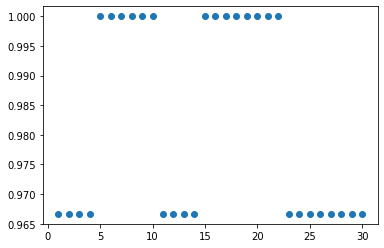

In [66]:
plt.scatter(np.arange(1,31),acc_list_balltree)

<div dir="rtl">

با بررسی نمودار بالا میبینیم که از k 23 به بعد مدل دچار بیش برازش شده است و برای k های 1 تا 4 و 9 تا 14 مدل موفق نشده است بعضی از نمونه ها را به درستی دسته بندی کند.

من مدل با تعداد همسایه برابر با 20 را بعنوان مدل بهینه انتخاب میکنم و داده‌ها را بوسیله این مدل دسته بندی میکنم:

<div>

In [67]:
knn_balltree = KNeighborsClassifier(n_neighbors=20, algorithm="ball_tree")
knn_balltree.fit(X_train_nor,y_train)
y_test_balltree = knn_balltree.predict(X_test)
knn_balltree.score(X_test, y_test)

1.0

In [68]:
confusion_matrix(y_test, y_test_balltree)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [69]:
iris = datasets.load_iris()
iris.data.shape

(150, 4)

# <div dir="rtl">نتیجه گیری قسمت a و b:</div>

<div dir="rtl">

با توجه به اینکه تعداد نمونه ها و ویژگیهای دیتاست iris خیلی زیاد نیست هر دو روش نتیجه یکسانی دارند.

این موضوع را با بررسی نمودار صحت براساس تعداد همسایه و همچنین ماتریس confusion نیز میتوان دریافت.

<div>

#c.

<div dir="rtl">

در سه سلول بعدی ابتدا دیتاست pop_failures را می‌خوانیم.

سپس داده ها را از برچسب جدا میکنیم.

در گام داده‌ها را به دو بخش آموزش و تست با توزیع 80/20 تقسیم می‌کنیم.

نهایتا داده‌های آموزشی را نرمالسازی می‌کنیم:

<div>

In [70]:
df_pop_failures = pd.read_csv("pop_failures.csv")

In [71]:
df_pop_failures = df_pop_failures.drop(['Unnamed: 0'], axis=1)
y = df_pop_failures['outcome']
X = df_pop_failures.drop(['outcome'], axis=1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_nor = preprocessing.normalize(X_train)


<div dir="rtl">

حال با استفاده از روش KNN و الگوریتم KDTree سعی می‌کنیم داده‌ها را کلاسبندی کنیم.

برای اینکه بهترین مقدار برای تعداد همسایه‌ها را بیابیم از تعداد 1 تا 30 همسایه را امتحان میکنیم و صحت مدل روی داده‌های تست را درون یک لیست ذخیره میکنیم.

<div>

In [ ]:
acc_list_kdtree = []
for value in range(1, 31):
  knn_kdtree = KNeighborsClassifier(n_neighbors=value, algorithm="kd_tree")
  knn_kdtree.fit(X_train_nor,y_train)
  acc_list_kdtree.append(knn_kdtree.score(X_test, y_test))


<div dir="rtl">

نمودار مقدار صحت مدل روی داده‌های تست را بر اساس تعداد همسایه رسم می‌کنیم تا دید بهتری نسبت به عملکرد این الگوریتم داشته باشیم.

<div>

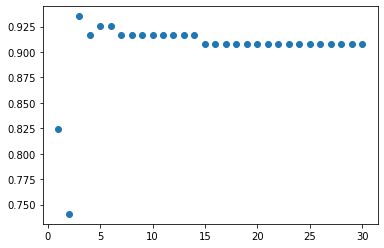

In [74]:
plt.scatter(np.arange(1,31),acc_list_kdtree)

<div dir="rtl">

با بررسی نمودار بالا متوجه میشویم که بهترین صحت به ازای k برابر با 3 رخ میدهد و حدودا میتوان گفت بعد از این بجز برای k 5 و 6 مدل مبا افزایش تعداد همسایه ها دچار بیش برازش شده و وضعیت بدتری پیدا کرده است.

من مدل با تعداد همسایه برابر با 3 را بعنوان مدل بهینه انتخاب میکنم و داده‌ها را بوسیله این مدل دسته بندی میکنم:

<div>

In [75]:
knn_kdtree = KNeighborsClassifier(n_neighbors=3, algorithm="kd_tree")
knn_kdtree.fit(X_train_nor,y_train)
y_test_kdtree = knn_kdtree.predict(X_test)
knn_kdtree.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9351851851851852

<div dir="rtl">

داده‌ها را با مدل بالا کلاسبندی میکنیم و با رسم confusion matrix میبینیم از 108 نمونه 7 نمونه نادرست کلاسبندی شده اند:

<div>

In [76]:
confusion_matrix(y_test, y_test_kdtree)

array([[ 3,  7],
       [ 0, 98]])


<div dir="rtl">

حال با استفاده از روش KNN و الگوریتم ball tree سعی می‌کنیم داده‌ها را کلاسبندی کنیم.

برای اینکه بهترین مقدار برای تعداد همسایه‌ها را بیابیم از تعداد 1 تا 30 همسایه را امتحان میکنیم و صحت مدل روی داده‌های تست را درون یک لیست ذخیره میکنیم.

<div>

In [ ]:
acc_list_balltree = []
for value in range(1, 31):
  knn_balltree = KNeighborsClassifier(n_neighbors=value, algorithm="ball_tree")
  knn_balltree.fit(X_train_nor,y_train)
  acc_list_balltree.append(knn_balltree.score(X_test, y_test))


<div dir="rtl">

نمودار مقدار صحت مدل روی داده‌های تست را بر اساس تعداد همسایه رسم می‌کنیم تا دید بهتری نسبت به عملکرد این الگوریتم داشته باشیم.

<div>

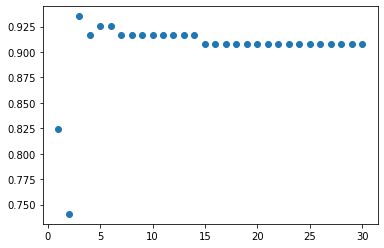

In [78]:
plt.scatter(np.arange(1,31),acc_list_balltree)

<div dir="rtl">

با بررسی نمودار بالا متوجه میشویم که بهترین صحت به ازای k برابر با 3 رخ میدهد و حدودا میتوان گفت بعد از این بجز برای k 5 و 6 مدل مبا افزایش تعداد همسایه ها دچار بیش برازش شده و وضعیت بدتری پیدا کرده است.

من مدل با تعداد همسایه برابر با 3 را بعنوان مدل بهینه انتخاب میکنم و داده‌ها را بوسیله این مدل دسته بندی میکنم:

<div>

In [79]:
knn_balltree = KNeighborsClassifier(n_neighbors=3, algorithm="ball_tree")
knn_balltree.fit(X_train_nor,y_train)
y_test_balltree = knn_balltree.predict(X_test)
knn_balltree.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9351851851851852

<div dir="rtl">

داده‌ها را با مدل بالا کلاسبندی میکنیم و با رسم confusion matrix میبینیم از 108 نمونه 7 نمونه نادرست کلاسبندی شده اند:

<div>

In [80]:
confusion_matrix(y_test, y_test_balltree)

array([[ 3,  7],
       [ 0, 98]])

In [81]:
df_pop_failures.shape

(540, 21)

# <div dir="rtl">نتیجه گیری قسمت c:</div>

<div dir="rtl">

با توجه به اینکه تعداد نمونه ها و ویژگیهای دیتاست pop_failures خیلی زیاد نیست هر دو روش نتیجه یکسانی دارند.

این موضوع را با بررسی نمودار صحت براساس تعداد همسایه و همچنین ماتریس confusion نیز میتوان دریافت.

<div>

#d.

<div dir="rtl">

در سه سلول بعدی ابتدا دیتاست banknote_authntication را می‌خوانیم.

سپس داده ها را از برچسب جدا میکنیم.

در گام داده‌ها را به دو بخش آموزش و تست با توزیع 80/20 تقسیم می‌کنیم.

نهایتا داده‌های آموزشی را نرمالسازی می‌کنیم:

<div>

In [82]:
df_banknote_authntication = pd.read_csv("banknote_authntication.csv")

In [83]:
df_banknote_authntication = df_banknote_authntication.drop(['Unnamed: 0'], axis=1)
y = df_banknote_authntication['label']
X = df_banknote_authntication.drop(['label'], axis=1)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_nor = preprocessing.normalize(X_train)


<div dir="rtl">

حال با استفاده از روش KNN و الگوریتم KDTree سعی می‌کنیم داده‌ها را کلاسبندی کنیم.

برای اینکه بهترین مقدار برای تعداد همسایه‌ها را بیابیم از تعداد 1 تا 30 همسایه را امتحان میکنیم و صحت مدل روی داده‌های تست را درون یک لیست ذخیره میکنیم.

<div>

In [ ]:
acc_list_kdtree = []
for value in range(1, 31):
  knn_kdtree = KNeighborsClassifier(n_neighbors=value, algorithm="kd_tree")
  knn_kdtree.fit(X_train_nor,y_train)
  acc_list_kdtree.append(knn_kdtree.score(X_test, y_test))


<div dir="rtl">

نمودار مقدار صحت مدل روی داده‌های تست را بر اساس تعداد همسایه رسم می‌کنیم تا دید بهتری نسبت به عملکرد این الگوریتم داشته باشیم.

<div>

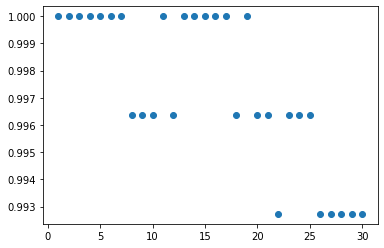

In [86]:
plt.scatter(np.arange(1,31),acc_list_kdtree)


<div dir="rtl">

با توجه به نمودار در میابیم که تدریجا مدل به سمت بیش برازش پیش میرود با افزایش تعداد همسایه ها

برای k های 1 تا 7 11 و 13 تا 18 و 20 مدل صحت 100 درصد دارم و به صورت تدریجی عملکرد مدل کاهش یافته است.

من تعداد همسایه برابر با 17 را بعنوان k بهینه انتخاب میکنم.

<div>

In [87]:
knn_kdtree = KNeighborsClassifier(n_neighbors=17, algorithm="kd_tree")
knn_kdtree.fit(X_train_nor,y_train)
y_test_kdtree = knn_kdtree.predict(X_test)
knn_kdtree.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


1.0


<div dir="rtl">

حال ماتریس confusionرا رسم میکنیم و در میابیم که همه ی نمونه ها بدرستی کلاسبندی شده اند.

با توجه به صحت مدل روی داده های تست نیز انتظار همین نتیجه را داشتیم.

<div>

In [88]:
confusion_matrix(y_test, y_test_kdtree)

array([[148,   0],
       [  0, 127]])


<div dir="rtl">

حال با استفاده از روش KNN و الگوریتم ball tree سعی می‌کنیم داده‌ها را کلاسبندی کنیم.

برای اینکه بهترین مقدار برای تعداد همسایه‌ها را بیابیم از تعداد 1 تا 30 همسایه را امتحان میکنیم و صحت مدل روی داده‌های تست را درون یک لیست ذخیره میکنیم.

<div>

In [ ]:
acc_list_balltree = []
for value in range(1, 31):
  knn_balltree = KNeighborsClassifier(n_neighbors=value, algorithm="ball_tree")
  knn_balltree.fit(X_train_nor,y_train)
  acc_list_balltree.append(knn_balltree.score(X_test, y_test))


<div dir="rtl">

نمودار مقدار صحت مدل روی داده‌های تست را بر اساس تعداد همسایه رسم می‌کنیم تا دید بهتری نسبت به عملکرد این الگوریتم داشته باشیم.

<div>





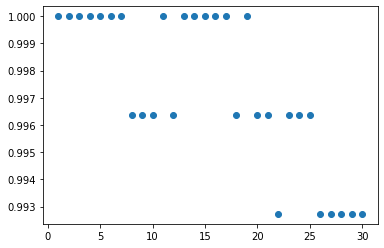

In [90]:
plt.scatter(np.arange(1,31),acc_list_balltree)


<div dir="rtl">

با توجه به نمودار در میابیم که تدریجا مدل به سمت بیش برازش پیش میرود با افزایش تعداد همسایه ها

برای k های 1 تا 7 11 و 13 تا 18 و 20 مدل صحت 100 درصد دارم و به صورت تدریجی عملکرد مدل کاهش یافته است.

من تعداد همسایه برابر با 17 را بعنوان k بهینه انتخاب میکنم.

<div>

In [91]:
knn_balltree = KNeighborsClassifier(n_neighbors=17, algorithm="ball_tree")
knn_balltree.fit(X_train_nor,y_train)
y_test_balltree = knn_balltree.predict(X_test)
knn_balltree.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


1.0


<div dir="rtl">

حال ماتریس confusionرا رسم میکنیم و در میابیم که همه ی نمونه ها بدرستی کلاسبندی شده اند.

با توجه به صحت مدل روی داده های تست نیز انتظار همین نتیجه را داشتیم.

<div>

In [92]:
confusion_matrix(y_test, y_test_balltree)

array([[148,   0],
       [  0, 127]])

In [93]:
X_train.shape

(1097, 4)

# <div dir="rtl">نتیجه گیری قسمت d:</div>

<div dir="rtl">

با توجه به اینکه تعداد نمونه ها و ویژگیهای دیتاست banknote_authntication خیلی زیاد نیست هر دو روش نتیجه یکسانی دارند.

این موضوع را با بررسی نمودار صحت براساس تعداد همسایه و همچنین ماتریس confusion نیز میتوان دریافت.

<div>

#e.

<div dir="rtl">

در سه سلول بعدی ابتدا دیتاست credit cards را می‌خوانیم.

سپس داده ها را از برچسب جدا میکنیم.

در گام داده‌ها را به دو بخش آموزش و تست با توزیع 80/20 تقسیم می‌کنیم.

نهایتا داده‌های آموزشی را نرمالسازی می‌کنیم:

<div>

In [94]:
df_credit_cards = pd.read_csv("credit cards.csv")

In [95]:
y = df_credit_cards['default']
X = df_credit_cards.drop(['default'], axis=1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_nor = preprocessing.normalize(X_train)


<div dir="rtl">

حال با استفاده از روش KNN و الگوریتم KDTree سعی می‌کنیم داده‌ها را کلاسبندی کنیم.

برای اینکه بهترین مقدار برای تعداد همسایه‌ها را بیابیم از تعداد 1 تا 30 همسایه را امتحان میکنیم و صحت مدل روی داده‌های تست را درون یک لیست ذخیره میکنیم.

<div>

In [97]:
acc_list_kdtree = []
for value in range(1, 31):
  knn_kdtree = KNeighborsClassifier(n_neighbors=value, algorithm="kd_tree")
  knn_kdtree.fit(X_train_nor,y_train)
  acc_list_kdtree.append(knn_kdtree.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names


<div dir="rtl">

نمودار مقدار صحت مدل روی داده‌های تست را بر اساس تعداد همسایه رسم می‌کنیم تا دید بهتری نسبت به عملکرد این الگوریتم داشته باشیم.

<div>





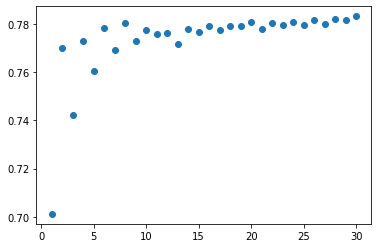

In [98]:
plt.scatter(np.arange(1,31),acc_list_kdtree)


<div dir="rtl">

با بررسی نمودار بالا در میابیم این دیتاست نسبت به دیتاستهای قبلی پیچیدگی بیشتر دارد و حتی با 30 همسایه نیز نمیتوان به صحت بیشتر از 80 درصد رسید.

بهترین نتیجه در این مورد به ازای k برابر با 30 به دست آمده و من نیز همین تعداد را برای دسته بندی داده ها انتخاب میکنم.

<div>



In [99]:
knn_kdtree = KNeighborsClassifier(n_neighbors=30, algorithm="kd_tree")
knn_kdtree.fit(X_train_nor,y_train)
y_test_kdtree = knn_kdtree.predict(X_test)
knn_kdtree.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.7831666666666667




<div dir="rtl">

در این قسمت confusion matrix را برای نتیجه کلاسبندی روی داده های تست نمایش میدهیم. 1301 داده از کل دادگان اشتباه دسته بندی شده اند و توزیع آنعا در ماتریس زیر مشخص است.

<div>



In [100]:
confusion_matrix(y_test, y_test_kdtree)

array([[4613,   74],
       [1227,   86]])


<div dir="rtl">

حال با استفاده از روش KNN و الگوریتم ball tree سعی می‌کنیم داده‌ها را کلاسبندی کنیم.

برای اینکه بهترین مقدار برای تعداد همسایه‌ها را بیابیم از تعداد 1 تا 30 همسایه را امتحان میکنیم و صحت مدل روی داده‌های تست را درون یک لیست ذخیره میکنیم.

<div>

In [ ]:
acc_list_balltree = []
for value in range(1, 31):
  knn_balltree = KNeighborsClassifier(n_neighbors=value, algorithm="ball_tree")
  knn_balltree.fit(X_train_nor,y_train)
  acc_list_balltree.append(knn_balltree.score(X_test, y_test))


<div dir="rtl">

نمودار مقدار صحت مدل روی داده‌های تست را بر اساس تعداد همسایه رسم می‌کنیم تا دید بهتری نسبت به عملکرد این الگوریتم داشته باشیم.

<div>





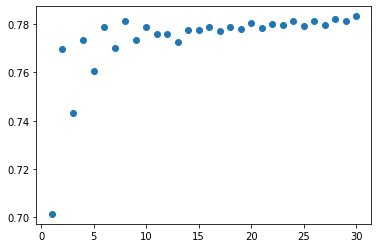

In [102]:
plt.scatter(np.arange(1,31),acc_list_balltree)



<div dir="rtl">

با بررسی نمودار بالا در میابیم این دیتاست نسبت به دیتاستهای قبلی پیچیدگی بیشتر دارد و حتی با 30 همسایه نیز نمیتوان به صحت بیشتر از 80 درصد رسید.

بهترین نتیجه در این مورد به ازای k برابر با 30 به دست آمده و من نیز همین تعداد را برای دسته بندی داده ها انتخاب میکنم.

<div>



In [103]:
knn_balltree = KNeighborsClassifier(n_neighbors=30, algorithm="ball_tree")
knn_balltree.fit(X_train_nor,y_train)
y_test_balltree = knn_balltree.predict(X_test)
knn_balltree.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.7833333333333333




<div dir="rtl">

در این قسمت confusion matrix را برای نتیجه کلاسبندی روی داده های تست نمایش میدهیم. 1300 داده از کل دادگان اشتباه دسته بندی شده اند و توزیع آنعا در ماتریس زیر مشخص است.

<div>



In [104]:
confusion_matrix(y_test, y_test_balltree)

array([[4614,   73],
       [1227,   86]])

In [105]:
X_train.shape

(24000, 23)

# <div dir="rtl">نتیجه گیری قسمت e:</div>

<div dir="rtl">

با توجه به اینکه تعداد نمونه های دیتاست credit card خیلی زیاد است پیشبینی میشود که استفاده از روش ball tree نتیجه بهتری داشته باشد.

پس از استفاده از هر دو روش و رسم نمودارهای صحت و همچنین ماتریس confusion در میابیم که درست پیشبینی صورت گرفته و الگوریتم ball tree بهتر از روش kdtree نمونه ها را دسته بندی کرده است.

<div>

# <div dir="rtl">  نتیجه گیری نهایی:</div>

<div dir="rtl">

الگوریتم درخت توپ و الگوریتم درخت KD الگوریتم های درختی هستند که برای تقسیم فضایی نقاط داده و تخصیص آنها به مناطق خاص استفاده می شوند. به عبارت دیگر، آنها برای ساختار داده ها در یک فضای چند بعدی استفاده می شوند.


برای داده هایی با ویژگیهای کم، الگوریتم درخت KD ممکن است بهترین راه حل باشد.  تقسیم گره های درخت KD به صورت محوری هستند و نمی توانند شکل متفاوتی داشته باشند. بنابراین توزیع ممکن است به درستی ترسیم نشود و منجر به عملکرد ضعیف شود.


برای داده هایی با تعداد ویژگی زیاد، الگوریتم درخت توپ ممکن است بهترین راه حل باشد. عملکرد آن به مقدار داده های آموزشی، ابعاد و ساختار داده ها بستگی دارد. وجود بسیاری از نقاط داده که دارای نویز هستند نیز می تواند به دلیل عدم ساختار واضح منجر به عملکرد بد شود.

<div>